In [ ]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/SYN'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
!pip install powerlaw
from SYN_package.functions import *
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import powerlaw
import warnings

Cloning into 'thesis'...
remote: Enumerating objects: 1402, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 1402 (delta 76), reused 39 (delta 22), pack-reused 1273
Receiving objects: 100% (1402/1402), 65.05 MiB | 11.40 MiB/s, done.
Resolving deltas: 100% (897/897), done.
Mounted at /content/drive


In [ ]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_PRO.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_news_PRO.csv')
vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_PRO.csv')
gb=pd.read_csv('/content/drive/MyDrive/thesis/data/gab/gab_PRO.csv')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


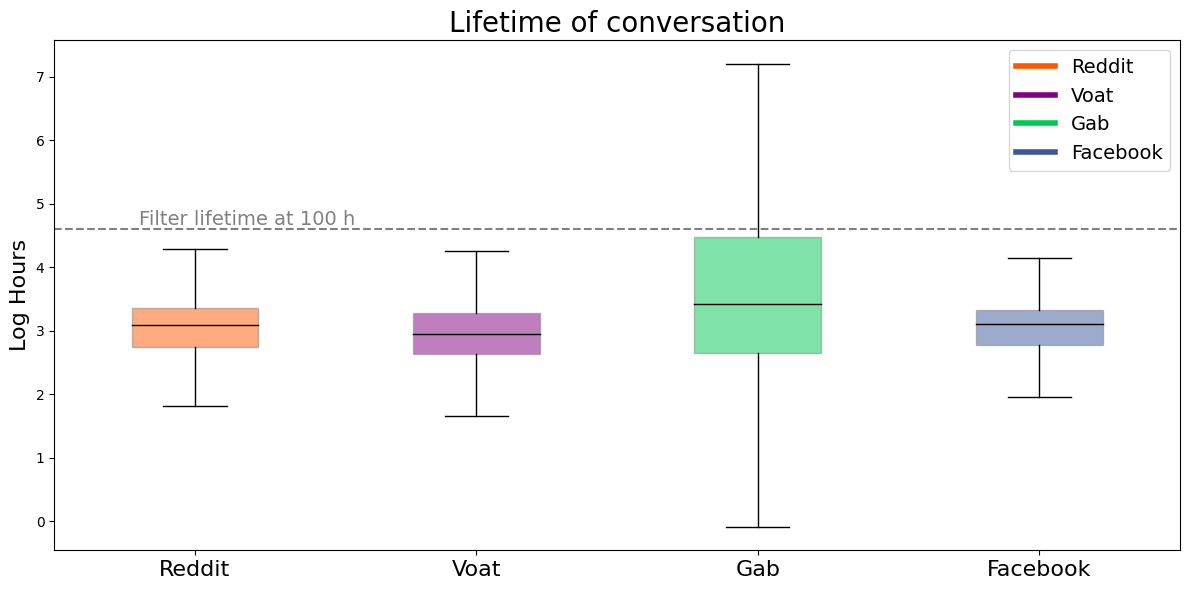

In [8]:
import matplotlib.pyplot as plt
import numpy as np

reddit_color = '#FF5700'
voat_color = '#800080'
facebook_color = '#3b5998'
gab_color = '#00c853'

# Define the data for the boxplots
fb_data = np.log(fb.groupby(['post_id'])['temporal_distance_birth_h'].quantile(0.95).reset_index()['temporal_distance_birth_h'])
rd_data = np.log(rd.groupby(['post_id'])['temporal_distance_birth_h'].quantile(0.95).reset_index()['temporal_distance_birth_h'])
gb_data = np.log(gb.groupby(['post_id'])['temporal_distance_birth_h'].quantile(0.95).reset_index()['temporal_distance_birth_h'])
vo_data = np.log(vo.groupby(['post_id'])['temporal_distance_birth_h'].quantile(0.95).reset_index()['temporal_distance_birth_h'])

# Create the figure and subplot
plt.figure(figsize=(12, 6))
plt.title('Lifetime of conversation', fontsize=20)

# Create the boxplots with customized colors
box = plt.boxplot([rd_data, vo_data, gb_data, fb_data], showfliers=False, patch_artist=True,
                  medianprops=dict(color='black'))

# Define the colors of the boxplots
colors = [reddit_color, voat_color, gab_color, facebook_color]

# Assign the colors and set transparency to the boxplots
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Make colors more transparent
    patch.set_edgecolor('gray')  # Set borders to gray

# Create the legend
plt.legend([plt.Line2D([0], [0], color=color, lw=4) for color in colors],
           ['Reddit', 'Voat', 'Gab', 'Facebook'], loc='upper right', fontsize=14)

# Axis labels
plt.xticks([1, 2, 3, 4], ['Reddit', 'Voat', 'Gab', 'Facebook'], fontsize=16)
plt.ylabel('Log Hours', fontsize=16)

# Reference line
plt.axhline(y=np.log(100), color='gray', linestyle='--')
plt.text(0.8, np.log(100), 'Filter lifetime at 100 h', color='gray', fontsize=14, verticalalignment='bottom')

# Show the plot
plt.tight_layout()
plt.show()
